In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.dpi"] = 70

import statsmodels.api as sm

In [2]:
data = pd.DataFrame({'risk 1': np.random.normal(0, 1, 300),
                     'risk 2': np.random.random(300)})

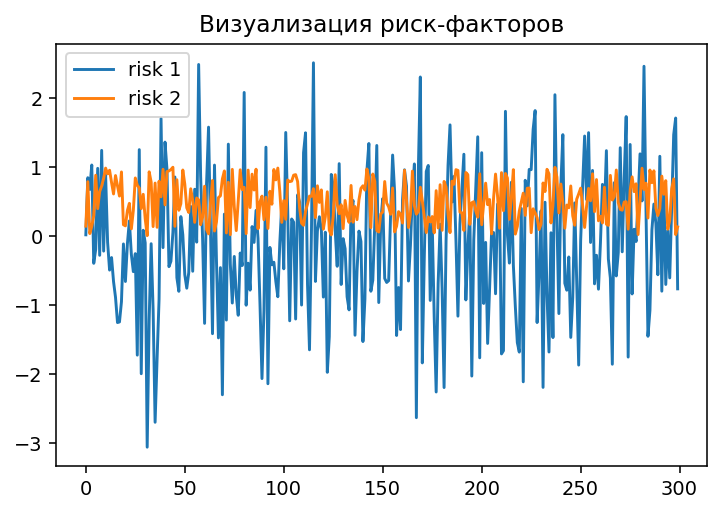

In [45]:
data.plot(title='Визуализация риск-факторов');

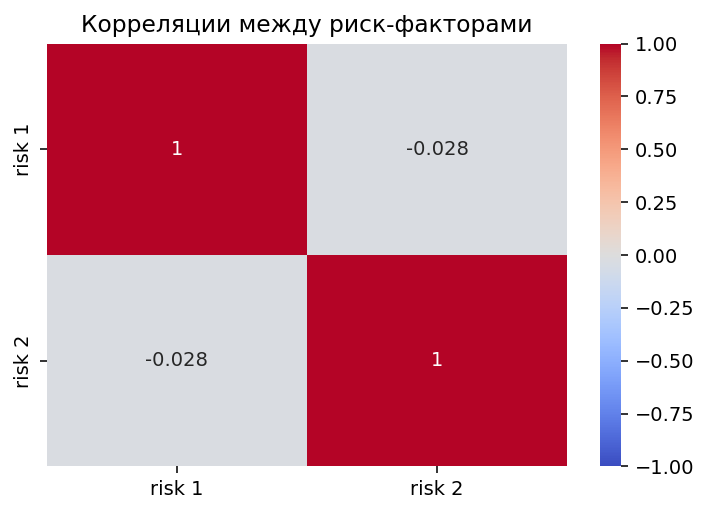

In [46]:
plt.title('Корреляции между риск-факторами')
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', vmin=-1);

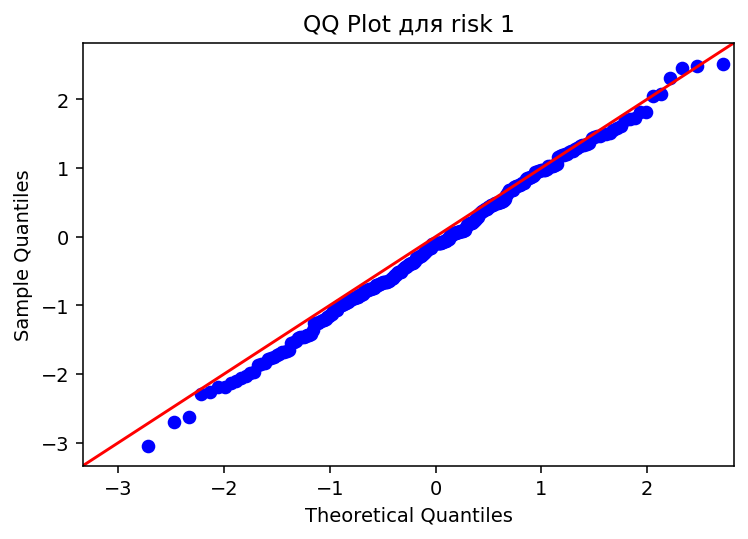

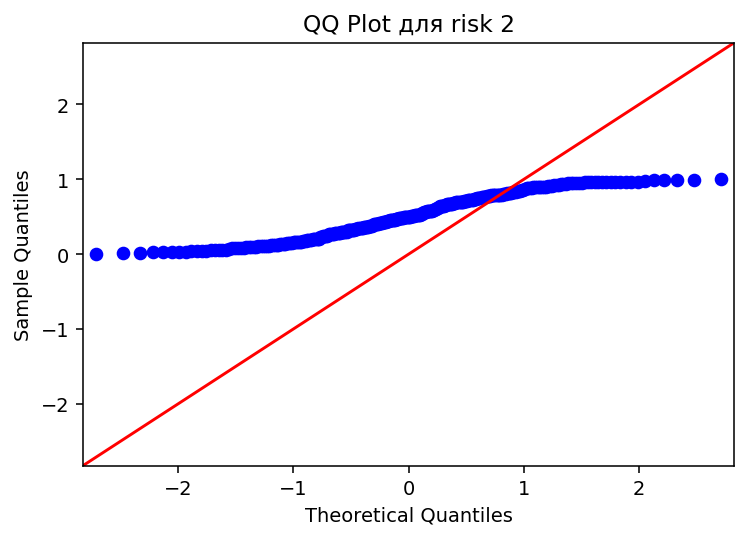

In [47]:
import warnings

for factor in data:
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        sm.qqplot(data[factor], line='45')

    plt.title(f'QQ Plot для {factor}')
    plt.show()

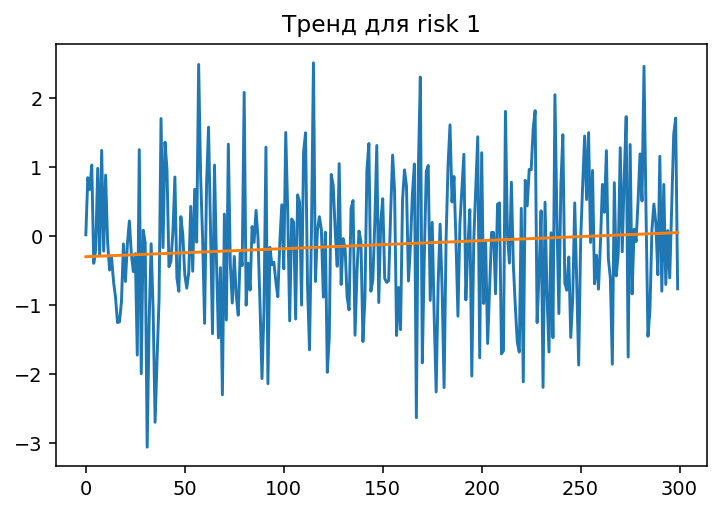

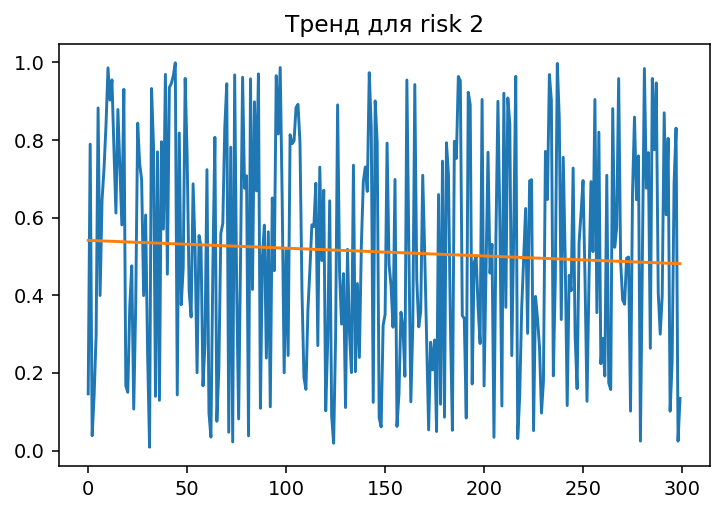

In [48]:
for factor in data:
    x = range(data.shape[0])
    trend_coefs = np.polyfit(x, data[factor], 1)
    trend = np.poly1d(trend_coefs)

    plt.plot(data[factor])
    plt.plot(trend(x))
    plt.title(f'Тренд для {factor}')
    plt.show()

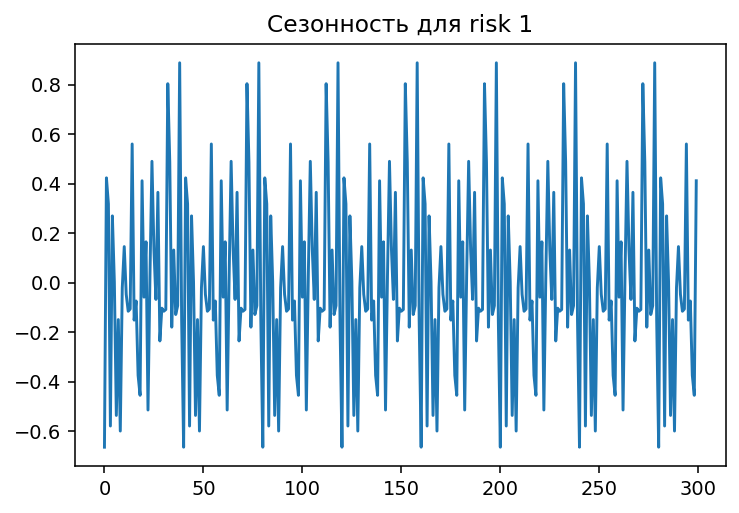

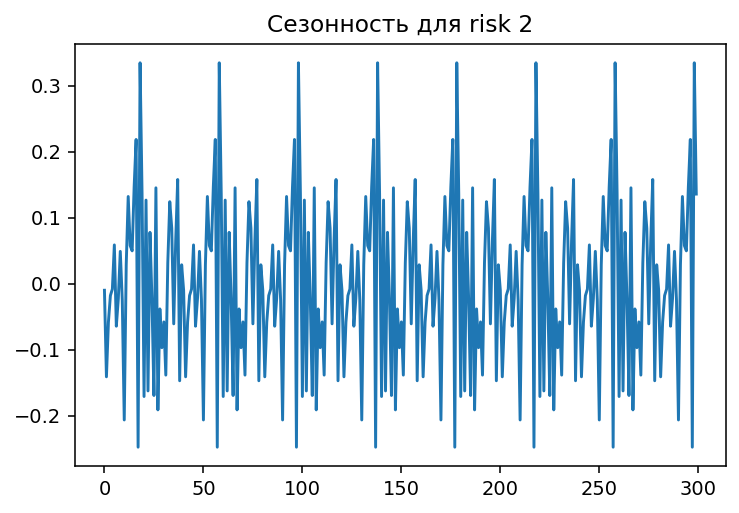

In [8]:
for factor in data:
    season_data = sm.tsa.seasonal_decompose(data[factor], period=40)
    season_data.seasonal.plot()
    plt.title(f'Сезонность для {factor}')
    plt.show()

In [10]:
for factor in data:
    pval = sm.tsa.stattools.adfuller(data[factor])[1]
    print(factor)
    print(f"Критерий Дики-Фуллера: p={pval:.2}")
    print('На уровне значимости 5% гипотеза о нестационарности '
          + 'отвергается' if pval <= 0.05 else 'не отвергается')
    print()

risk 1
Критерий Дики-Фуллера: p=5.5e-30
На уровне значимости 5% гипотеза о нестационарности отвергается

risk 2
Критерий Дики-Фуллера: p=0.0
На уровне значимости 5% гипотеза о нестационарности отвергается

